In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
directory = "./Data/by_class"


tlist = []
tlistkey = []
for r, d, f in os.walk(directory):
    for file in f:
        if "train" in file:
            tlist.append(os.path.join(r, file))
            tlistkey.append(file)

In [4]:
len(tlist)

731668

In [5]:
charkey = []
for item in tlistkey:
    temp = item[6:8]
    charkey.append(bytearray.fromhex(temp).decode())
    

In [16]:
ex = tlistkey[600000]

ex = ex[6:8]
ex
bytearray.fromhex(ex).decode()

'e'

In [17]:
tlist[23423]

'./Data/by_class\\30\\train_30\\train_30_23423.png'

In [6]:
len(charkey)

731668

In [15]:
from PIL import Image  

In [ ]:
tren=[]
for file in tlist:
    im = Image.open(file)
    tren.append(np.array(im))
    
    
    

In [18]:
import pickle

pickle.dump(charkey,open('yset.pkl','wb'))
pickle.dump(tlist, open('xset.pkl','wb'))

In [5]:
import pickle
xset = pickle.load(open('xset.pkl','rb'))
yset = pickle.load(open('yset.pkl', 'rb'))

In [35]:
import cv2

In [36]:
X=[None]*731668
slen= 731668
for file in range(slen):
    im = cv2.imread(xset[file],0)
    X[file]= im
    

In [40]:
np.array(X)

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

In [41]:
np.save('imgset', X)

In [38]:
X[123]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

'3'

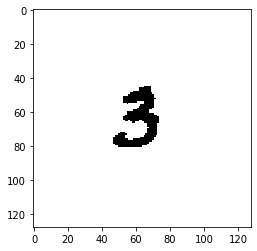

In [49]:
somechar= X[120363]
plt.imshow(somechar, cmap='gray')

yset[120363]

In [54]:
whatval = X[331232]
image1 = Image.fromarray(whatval)


TypeError: bad argument type for built-in operation

In [55]:
cvim1 = cv2.imread(xset[123212])

In [57]:
cvim1.shape

(128, 128, 3)

All images are type RGB and 128 by 128 pixels

In [59]:
np.array(yset)
np.save('CharKey',yset)

In [2]:
imgset= np.load('imgset.npy')
charkey = np.load('Charkey.npy')

In [4]:
from sklearn.utils import shuffle

charkey, imgset = shuffle(charkey,imgset)

In [5]:
charkey

array(['g', '6', '9', ..., '8', '4', 'r'], dtype='<U1')

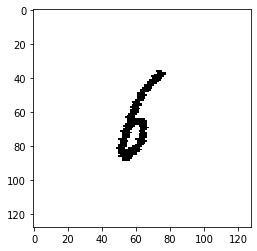

In [7]:
plt.imshow(imgset[1], cmap='gray')

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(imgset, charkey, test_size = .33, random_state = 42)

In [14]:
y_train


array(['t', '4', '6', ..., 'P', '3', '8'], dtype='<U1')

In [21]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (128,128,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(62, activation = 'softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3211328   
__________